## Regression of final grades
Task:

Write a linear regression algorithmen for the final grades of students.

Assume the dataset to be clean and ready for usage.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

Accuracy: 0.836
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              4266.
Date:                Fri, 07 Feb 2020   Prob (F-statistic):                   3.43e-207
Time:                        06:46:23   Log-Likelihood:                         -582.01
No. Observations:                 276   AIC:                                      1168.
Df Residuals:                     274   BIC:                                      1175.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

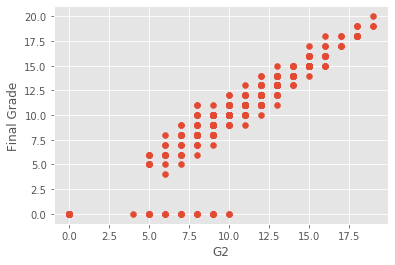

In [2]:
df = pd.read_csv('data\\student-mat.csv', delimiter=';')

feature_list = ['G1', 'G2', 'G3', 'studytime', 'failures', 'absences', 'sex', 'internet', 'Pstatus']
train_list = ['G2', 'failures']
target_feature = 'G3'

df = df[feature_list]
df = pd.get_dummies(df, drop_first=True)

X = np.array(df[train_list])
y = np.array(df[target_feature])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

model_skl = linear_model.LinearRegression(fit_intercept=False)
model_skl.fit(X_train, y_train)
params = np.append(model_skl.intercept_, model_skl.coef_)
predictions_skl = model_skl.predict(X_test)
acc_skl = model_skl.score(X_test, y_test)
print("Accuracy: {0:.3f}".format(acc_skl))

# Same model in statsmodels
model_sm = sm.OLS(y_train, X_train).fit()
predictions_sm = model_sm.predict(X_test)
print(model_sm.summary())
with open("student_model.pickle", "wb") as f:
    pickle.dump(model_sm, f)

pickle_in = open("student_model.pickle", "rb")
loaded_model_sm = pickle.load(pickle_in)

style.use("ggplot")
plot_feature = 'G2'
plt.scatter(df[plot_feature], df[target_feature])
plt.xlabel(plot_feature)
plt.ylabel('Final Grade')
plt.savefig(''.join([plot_feature,'_scatterplot.png']))
plt.show()